In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

if os.path.isdir("/content/drive/My Drive/ServeNet"):
  os.chdir("/content/drive/My Drive/ServeNet")
else: 
  !git clone https://github.com/yylonly/ServeNet.git
  os.chdir("/content/drive/My Drive/ServeNet")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas.io.json import json_normalize
from pandas import HDFStore, read_hdf

%matplotlib inline 

## 1. Load from Text

In [ ]:
with open('Data/ProgrammWebScrapy.txt', encoding='utf-8') as data_file:
    f = data_file.read()
    data = json.loads(f, strict=False)

In [ ]:
df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')

In [ ]:
df[1:11]

,Title,Description,APIEndpoint,APIPortalHomePage,PrimaryCategory,SecondaryCategories,APIProvider,SSLSupport,APIForumMessageBoards,AuthenticationModel,IstheAPIDesign,Scope,DeviceSpecific,DocsHomePageUR,ArchitecturalStyle,SupportedRequestFormats,SupportedResponseFormats,IsThisanUnofficialAPI,RestrictedAccess,SupportEmailAddress
1,Twitter API,"It has been split into multiple APIs, includin...",http://twitter.com/statuses/,https://dev.twitter.com/rest/public,Social,Blogging,Twitter,No,http://groups.google.com/group/twitter-develop...,OAuth 2,Yes,Single purpose API,No,https://dev.twitter.com/rest/public,REST,URI Query String/CRUD,"Atom, JSON, RSS, XML",No,No,api@twitter.com
2,YouTube API,The Data API allows users to integrate their p...,https://www.youtube.com/iframe_api,https://developers.google.com/youtube/,Video,Media,Google,No,http://groups.google.com/group/youtube-api/,API Key,No,Single purpose API,No,https://developers.google.com/youtube/,REST,"Atom, GData, RSS, URI Query String/CRUD, Atom ...","XML, JSON, GData, Atom, RSS",No,No,NaN
3,Flickr API,The Flickr API can be used to retrieve photos ...,http://api.flickr.com/services/,http://www.flickr.com/services/api/,Photos,Video,Flickr,Yes,http://www.flickr.com/groups/api,OAuth 1,No,Single purpose API,No,http://www.flickr.com/services/api/,REST,"URI Query String/CRUD, XML, PHP, XML-RPC","JSON, XML, PHP, XML-RPC",No,No,NaN
4,Facebook API,Its functions have been split among the follow...,http://api.facebook.com/restserver.php,https://developers.facebook.com/,Social,Webhooks,Facebook,Yes,http://forum.developers.facebook.com/,"API Key, OAuth 2",No,Single purpose API,No,https://developers.facebook.com/,REST,URI Query String/CRUD,JSON,No,No,NaN
5,Amazon Product Advertising API,What was formerly the ECSeCommerce Servicehas ...,http://webservices.amazon.com/,https://affiliate-program.amazon.com/gp/advert...,eCommerce,Advertising,Amazon,No,http://developer.amazonwebservices.com/connect...,API Key,Yes,Single purpose API,No,https://docs.aws.amazon.com/AWSECommerceServic...,REST,"SOAP, XML","SOAP, XML",No,Yes,NaN
6,Twilio API,Twilio provides a simple hosted API and markup...,https://api.twilio.com/2010-04-01,http://www.twilio.com,Telephony,"Cloud, Text-to-Speech, Voice, Webhooks",Twilio,Yes,https://www.twilio.com/blog,"API Key, HTTP Basic Auth",No,Single purpose API,No,https://www.twilio.com/docs/api/rest,REST,URI Query String/CRUD,"CSV, HTML, JSON, XML",No,No,help@twilio.com
7,Last.fm API,The Last.fm API gives users the ability to bui...,http://ws.audioscrobbler.com/2.0/,http://www.last.fm/api,Music,NaN,Last.fm,No,http://www.last.fm/group/Last.fm+Web+Services/...,"API Key, Shared Secret, Token",Yes,Single purpose API,No,http://www.last.fm/api,REST,URI Query String/CRUD,"JSON, XML",No,No,office@last.fm
8,eBay API,eBay's primary web services are found in the t...,http://developer.ebay.com/webservices/latest/e...,https://go.developer.ebay.com/developers/ebay,Search,"Auctions, eCommerce",NaN,Yes,http://developer.ebay.com/community/forums/,NaN,No,Single purpose API,No,https://go.developer.ebay.com/developers/ebay,REST,"XML, SOAP, URI Query String/CRUD, name-value","XML, SOAP, JSON",No,No,NaN
9,Twilio SMS API,Twilio provides a simple hosted API and markup...,NaN,http://www.twilio.com/sms,Messaging,"Telephony, USA",NaN,Yes,http://forum.twilio.com/twilio/?from_gsfn=true,NaN,No,Single purpose API,No,http://www.twilio.com/sms,REST,None Specified,XML,No,No,NaN
10,Microsoft Bing Maps API,Bing Maps API and Interactive SDK features an ...,See-> http://dev.live.com/virtualearth/sdk/,http://www.microsoft.com/maps/choose-your-bing...,Mapping,Viewer,Microsoft,Yes,http://social.msdn.microsoft.com/forums/en-US/...,API Key,No,Single purpose API,No,http://www.microsoft.com/maps/choose-your-bing...,Indirect,"KML, XML, GeoRSS, JavaScript",KML,No,No,NaN


In [ ]:
df.shape

(15344, 20)

In [ ]:
df.columns

Index(['Title', 'Description', 'APIEndpoint', 'APIPortalHomePage',
       'PrimaryCategory', 'SecondaryCategories', 'APIProvider', 'SSLSupport',
       'APIForumMessageBoards', 'AuthenticationModel', 'IstheAPIDesign',
       'Scope', 'DeviceSpecific', 'DocsHomePageUR', 'ArchitecturalStyle',
       'SupportedRequestFormats', 'SupportedResponseFormats',
       'IsThisanUnofficialAPI', 'RestrictedAccess', 'SupportEmailAddress'],
      dtype='object')

In [ ]:
# equal to df.PrimaryCategory
label = df['PrimaryCategory']
label

0          Mapping
1           Social
2            Video
3           Photos
4           Social
           ...    
15339     Security
15340        Email
15341        Games
15342    Financial
15343      Medical
Name: PrimaryCategory, Length: 15344, dtype: object

## Preprocessing Null

### Some Category is Null

In [ ]:
label.isnull().sum()

35

In [ ]:
label[label.isnull()]

93       NaN
113      NaN
281      NaN
298      NaN
587      NaN
629      NaN
639      NaN
659      NaN
982      NaN
1307     NaN
1359     NaN
1371     NaN
1387     NaN
1920     NaN
3140     NaN
4066     NaN
4666     NaN
11668    NaN
12240    NaN
12465    NaN
12750    NaN
12813    NaN
13378    NaN
13423    NaN
13544    NaN
13819    NaN
14100    NaN
14637    NaN
14659    NaN
14682    NaN
14687    NaN
14852    NaN
14876    NaN
14887    NaN
15267    NaN
Name: PrimaryCategory, dtype: object

### Get rid of Null Category Entry

In [ ]:
data = df.loc[label.notnull(), :]

### Get rid of Description and Category is ''

In [ ]:
des = data.Description
des.isnull().sum()
data = df[df.Description != '']

In [ ]:
data = data[data.PrimaryCategory != '']
data.shape

(15340, 20)

In [ ]:
data = data[data.Title != '']
data.shape

(15340, 20)

In [ ]:
data = data[data.ArchitecturalStyle != '']
data.shape

(15340, 20)

### Checking Second Entry

In [ ]:
data.loc[2, 'Description']

"The Data API allows users to integrate their program with YouTube and allow it to perform many of the operations available on the website. It provides the capability to search for videos, retrieve standard feeds, and see related content. A program can also authenticate as a user to upload videos, modify user playlists, and more. This integration can be used for a variety of uses such as developing a web application allowing users to upload video to YouTube, or a device or desktop application that brings the YouTube experience to a new platform. The Data API gives users programmatic access to the video and user information stored on YouTube. This can be used to personalize a web site or application with the user's existing information as well as perform actions like commenting on and rating videos. This RESTful API provides responses in XML format."

In [ ]:
data.loc[2, 'PrimaryCategory']

'Video'

In [ ]:
data.loc[2, 'ArchitecturalStyle']

'REST'

In [ ]:
data.loc[2, 'Title']

'YouTube API'

In [ ]:
data.loc[:, 'PrimaryCategory'].head()

0    Mapping
1     Social
2      Video
3     Photos
4     Social
Name: PrimaryCategory, dtype: object

### How many primary category in the data?

In [ ]:
len(set(data.loc[:, 'PrimaryCategory']))

402

In [ ]:
style = data['ArchitecturalStyle']
style

0        REST
1        REST
2        REST
3        REST
4        REST
         ... 
15339    REST
15340     RPC
15341    REST
15342    REST
15343    REST
Name: ArchitecturalStyle, Length: 15340, dtype: object

In [ ]:
style.isnull().sum()

880

In [ ]:
style = style.loc[style.notnull()]
set(style)

{'GraphQL',
 'Indirect',
 'Native/Browser',
 'Push/Streaming',
 'REST',
 'RPC',
 'Unspecified'}

In [ ]:
style.value_counts()

REST              12795
RPC                1228
Push/Streaming      180
Native/Browser      175
Indirect             72
GraphQL               8
Unspecified           2
Name: ArchitecturalStyle, dtype: int64

### Final Data 

In [ ]:
finaldata = pd.DataFrame(data, columns=['Title', 'Description', 'PrimaryCategory'])

In [ ]:
finaldata.columns = ['ServiceName', 'ServiceDescription', 'ServiceClassification']

In [ ]:
finaldata.shape

(15340, 3)

## Preview

In [ ]:
top10 = finaldata.head(5)
#top10.style.set_properties(subset=['Service Classification'], **{'width': '400px', 'text-align': 'left'})
#top10.style.set_properties(subset=['Service Desciption'], **{'width': '600px', 'text-align': 'left', "font-size": "100%"})


styles = [
    dict(selector="th", props=[("font-size", "160%"), ("text-align", "left")]),
    dict(selector="td", props=[("font-size", "100%"), ("text-align", "left")]),
    dict(selector="caption", props=[("caption-side", "bottom"), ('width', '600px')]),
]
top10.style.set_table_styles(styles)

#top10.style.set_properties(subset=['Service Classification'], **{'width': '150px', 'text-align': 'left'})


# html

,ServiceName,ServiceDescription,ServiceClassification
0,Google Maps API,"Google Maps' services have been split into multiple APIs, including the Static Maps API, Street View Image API, Directions APIs, Distance Matrix API, Elevation API, Geocoding API, Geolocation API, Places API, Roads API, and Time Zone API. This page is maintained purely for historical and research purposes.] The Google Maps API allow for the embedding of Google Maps onto web pages of outside developers, using a simple JavaScript interface or a Flash interface. It is designed to work on both mobile devices as well as traditional desktop browser applications. The API includes language localization for over 50 languages, region localization and geocoding, and has mechanisms for enterprise developers who want to utilize the Google Maps API within an intranet. The API HTTP services can be accessed over a secure (HTTPS) connection by Google Maps API Premier customers.",Mapping
1,Twitter API,"It has been split into multiple APIs, including the Twitter Ads API, Twitter Search Tweets API, and Twitter Direct Message API. This profile is maintained for historical, research, and reference purposes only.The Twitter micro-blogging service includes two RESTful APIs. The Twitter REST API methods allow developers to access core Twitter data. This includes update timelines, status data, and user information. The Search API methods give developers methods to interact with Twitter Search and trends data. The API presently supports the following data formats: XML, JSON, and the RSS and Atom syndication formats, with some methods only accepting a subset of these formats.",Social
2,YouTube API,"The Data API allows users to integrate their program with YouTube and allow it to perform many of the operations available on the website. It provides the capability to search for videos, retrieve standard feeds, and see related content. A program can also authenticate as a user to upload videos, modify user playlists, and more. This integration can be used for a variety of uses such as developing a web application allowing users to upload video to YouTube, or a device or desktop application that brings the YouTube experience to a new platform. The Data API gives users programmatic access to the video and user information stored on YouTube. This can be used to personalize a web site or application with the user's existing information as well as perform actions like commenting on and rating videos. This RESTful API provides responses in XML format.",Video
3,Flickr API,"The Flickr API can be used to retrieve photos from the Flickr photo sharing service using a variety of feedspublic photos and videos, favorites, friends, group pools, discussions, and more. The API can also be used to upload photos and video.The Flickr API supports many protocols including REST, SOAP, XML-RPC. Responses can be formatted in XML, XML-RPC, JSON and PHP. Documentation is included for 14 API Kit libraries.",Photos
4,Facebook API,"Its functions have been split among the following APIs: Facebook Ads, Facebook Atlas, Facebook Graph, and Facebook Marketing. This profile is being maintained purely for historical and research purposes.] The Facebook API is a platform for building applications that are available to the members of the social network of Facebook. The API allows applications to use the social connections and profile information to make applications more involving, and to publish activities to the news feed and profile pages of Facebook, subject to individual users privacy settings. With the API, users can add social context to their applications by utilizing profile, friend, Page, group, photo, and event data. The API uses RESTful protocol and responses are in JSON format.",Social


## 2. Categories Anaylsis

### Count Number of Categories

In [ ]:
labelcount = finaldata['ServiceClassification'].value_counts()
labelcount

Tools        767
Financial    687
Messaging    511
eCommerce    466
Payments     460
            ... 
Notes          1
Trivia         1
Adoption       1
European       1
REST           1
Name: ServiceClassification, Length: 401, dtype: int64

In [ ]:
serviceName = finaldata['ServiceName']
serviceName

0                        Google Maps API
1                            Twitter API
2                            YouTube API
3                             Flickr API
4                           Facebook API
                      ...               
15339                         Mollom API
15340    FraudLabs MailBox Validator API
15341                         Weewar API
15342            XigniteGlobalQuotes API
15343                           PDBj API
Name: ServiceName, Length: 15340, dtype: object

### Category Number > 100

In [ ]:
labelcount[labelcount > 100].count()

41

### Category Number > 200

In [ ]:
labelcount[labelcount > 200].count()

22

In [ ]:
labelcount[0:10]

Tools         767
Financial     687
Messaging     511
eCommerce     466
Payments      460
Social        433
Enterprise    412
Mapping       362
Government    304
Telephony     300
Name: ServiceClassification, dtype: int64

In [ ]:
labelcount[0:20]

Tools             767
Financial         687
Messaging         511
eCommerce         466
Payments          460
Social            433
Enterprise        412
Mapping           362
Government        304
Telephony         300
Science           298
Email             255
Search            251
Video             251
Reference         251
Security          251
Travel            243
Sports            228
Advertising       224
Transportation    218
Name: ServiceClassification, dtype: int64

In [ ]:
labelcount[0:30]

Tools                 767
Financial             687
Messaging             511
eCommerce             466
Payments              460
Social                433
Enterprise            412
Mapping               362
Government            304
Telephony             300
Science               298
Email                 255
Search                251
Video                 251
Reference             251
Security              251
Travel                243
Sports                228
Advertising           224
Transportation        218
Education             215
Games                 203
Music                 191
Photos                185
Cloud                 173
Other                 158
Bitcoin               143
Data                  142
Project Management    142
Shipping              136
Name: ServiceClassification, dtype: int64

In [ ]:
labelcount[0:40]

Tools                      767
Financial                  687
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Government                 304
Telephony                  300
Science                    298
Email                      255
Search                     251
Video                      251
Reference                  251
Security                   251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      191
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Data                       142
Project Management         142
Shipping                   136
Database                   136
Backend                    134
Stocks  

In [ ]:
labelcount[0:50]

Tools                      767
Financial                  687
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Government                 304
Telephony                  300
Science                    298
Email                      255
Search                     251
Video                      251
Reference                  251
Security                   251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      191
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Data                       142
Project Management         142
Shipping                   136
Database                   136
Backend                    134
Stocks  

In [ ]:
labelcount[0:100]

Tools            767
Financial        687
Messaging        511
eCommerce        466
Payments         460
                ... 
Addresses         30
Browsers          29
Notifications     29
Sales             29
Bookmarks         28
Name: ServiceClassification, Length: 100, dtype: int64

### Half of categories less than 10

In [ ]:
labelcount[labelcount < 10].count()

217

In [ ]:
labelcount[labelcount > 100].count()

41

In [ ]:
labelcount[labelcount == 1].count()

41

In [ ]:
labelcount[-41:-1]

Civics                 1
Summary                1
Recreation             1
OAuth                  1
API Education          1
Drawing                1
Virtualization         1
History                1
Developer Relations    1
German                 1
Sustainability         1
Announcements          1
Canadian               1
iPaaS                  1
Polls                  1
Australian             1
Contracts              1
Copyright              1
Flowers                1
Postcodes              1
Accessibility          1
Panorama               1
Housing                1
Discounts              1
Subtitles              1
Tourism                1
Availability           1
Viewer                 1
Gestures               1
Datacenter             1
Economics              1
Gadgets                1
Newsletters            1
Modules                1
African                1
IDE                    1
Notes                  1
Trivia                 1
Adoption               1
European               1


In [ ]:
maxcount = labelcount[0]
np.mean(abs(maxcount - labelcount))

728.8329177057357

### Histogram

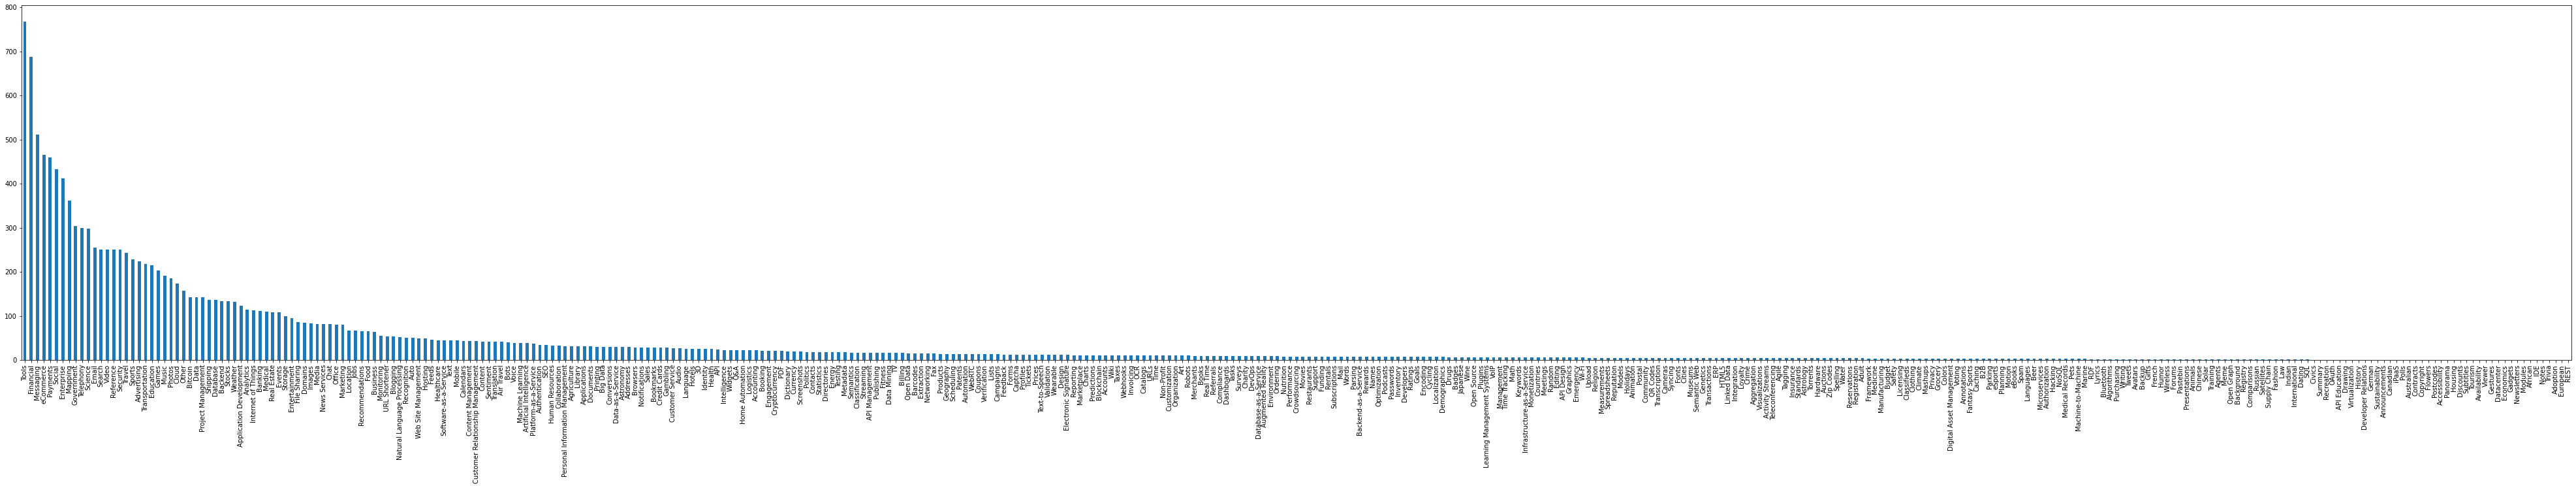

In [ ]:
plt.figure(figsize=(70, 10))
labelcount.plot(kind='bar')
plt.savefig('Data/HistogramAllCatagories.pdf', format='pdf', dpi=300)

### Get TOP 50 categories dataset

In [ ]:
top50 = labelcount[0:50]

In [ ]:
top50list = list(top50.index)
top50index = finaldata['ServiceClassification'].isin(top50list)

In [ ]:
top50data = finaldata.loc[top50index]
top50data.shape

(10957, 3)

In [ ]:
top50labelcount = top50data['ServiceClassification'].value_counts()

In [ ]:
maxcount = top50labelcount[0]
np.mean(abs(maxcount - top50labelcount))

547.86

In [ ]:
colors = "bgrcmykw"
color_index = 0

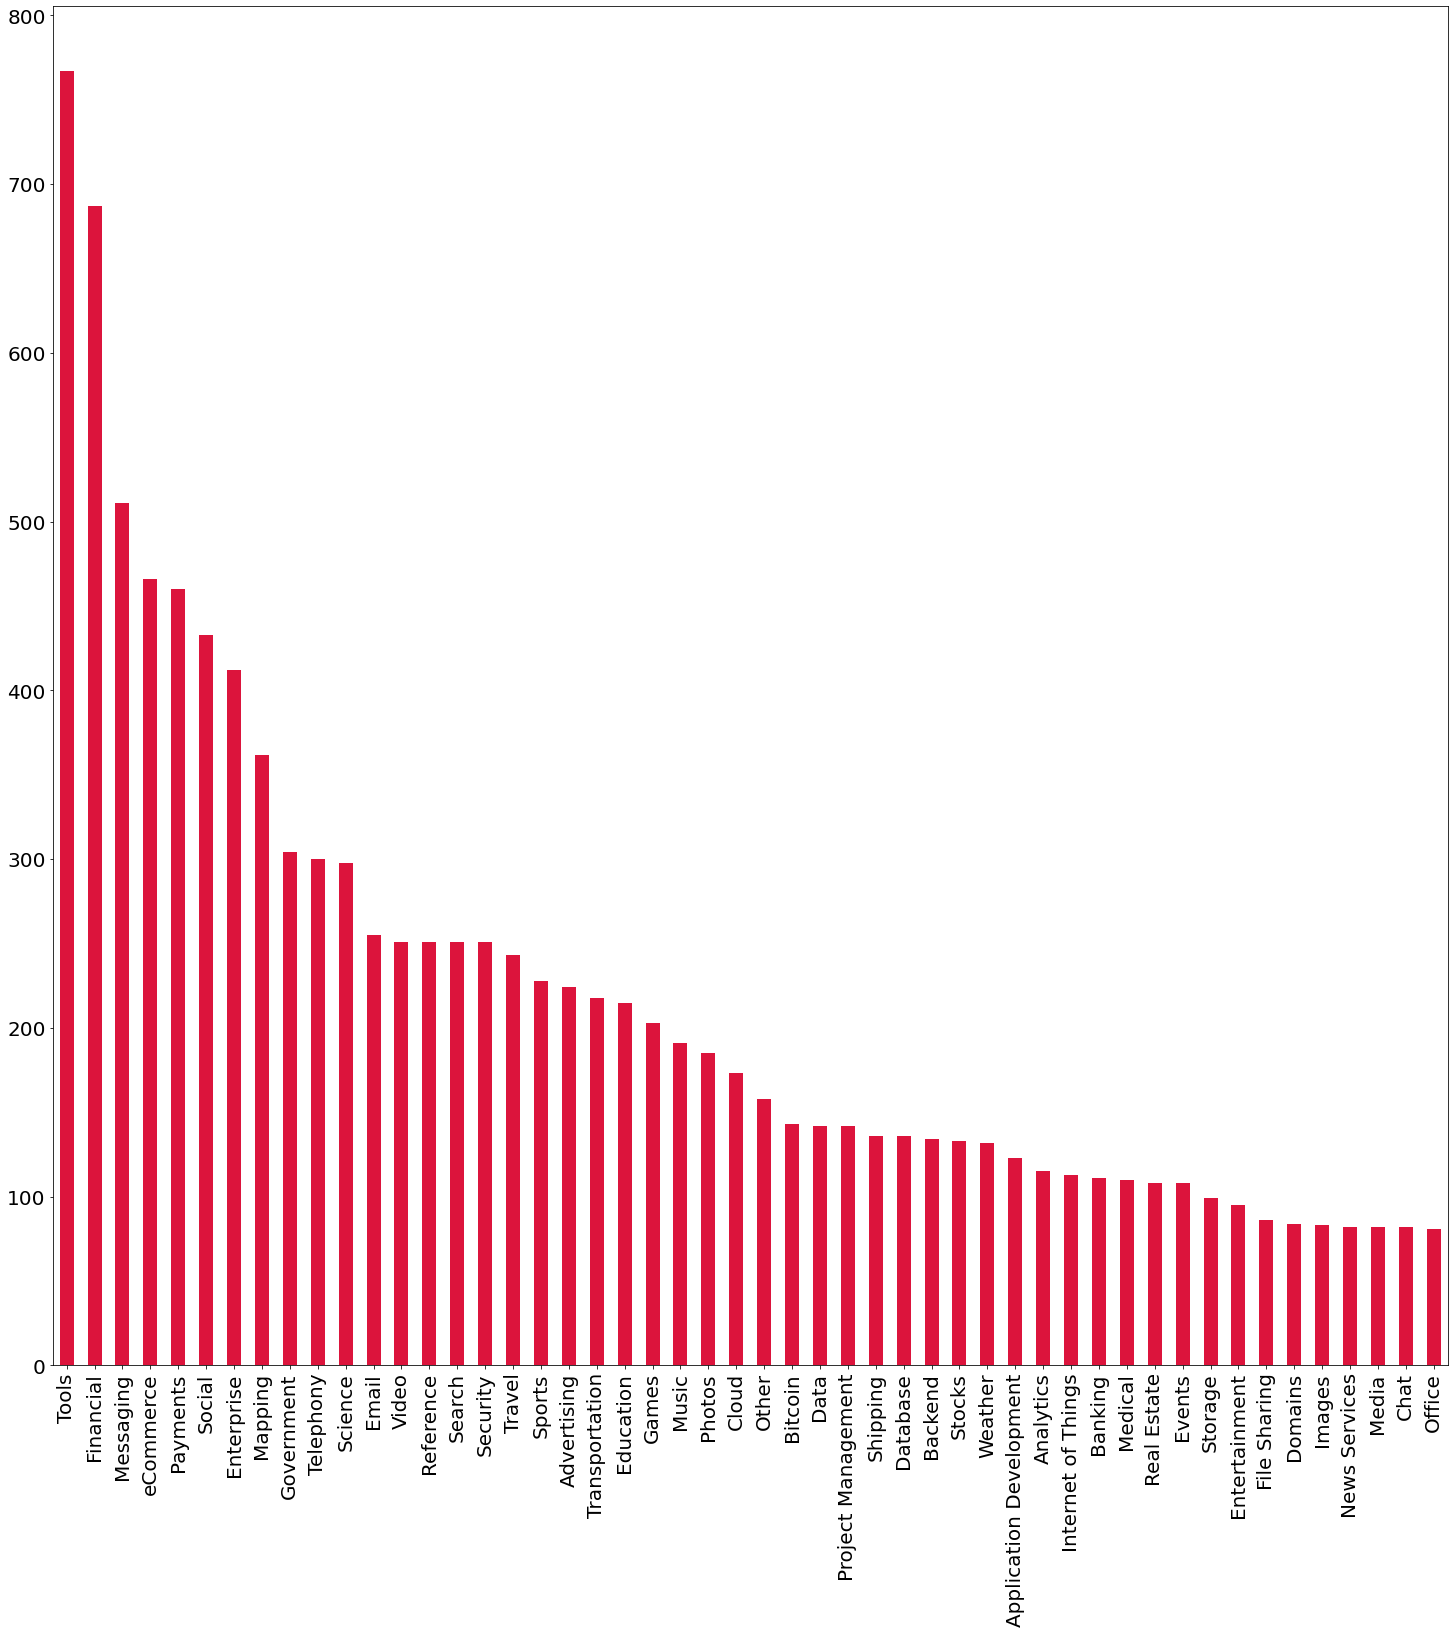

In [ ]:
plt.figure(figsize=(25, 25))
plt.rcParams['axes.labelweight'] = 'bold'
top50labelcount.plot(kind='bar', fontsize=20, facecolor='crimson')
plt.savefig('Data/HistogramTop50.pdf', format='pdf', dpi=300)

In [ ]:
top50labelcount

Tools                      767
Financial                  687
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Government                 304
Telephony                  300
Science                    298
Email                      255
Video                      251
Reference                  251
Search                     251
Security                   251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      191
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Data                       142
Project Management         142
Shipping                   136
Database                   136
Backend                    134
Stocks  

## 3. Service Description to Vector

In [ ]:
import numpy as np
from math import *
from scipy import stats

### Max Length of the Name and Description

In [ ]:
top50data[top50data['ServiceDescription'] == max(top50data['ServiceDescription'], key=len)]

,ServiceName,ServiceDescription,ServiceClassification
11856,GroupDocs API,GroupDocs is an online document management pla...,File Sharing


In [ ]:
top50data[top50data['ServiceName'] == max(top50data['ServiceName'], key=len)]

,ServiceName,ServiceDescription,ServiceClassification
4104,"MAS Table III.7 SGX-ST: Price Index, Number of...","The MAS Table III.7 SGX-ST: Price Index, Numbe...",Stocks


In [ ]:
max(top50data['ServiceDescription'], key=len)

'GroupDocs is an online document management platform. GroupDocs allows users and organizations to manage and revise documents, create digital signatures, collaborate on documents, and search for all documents within groups. Various annotation options such as highlighting, underlining, striking out text as well as leaving comments on the text/images are included to make the proof-reading process easier for users. GroupDocs Annotation API for Kentico provides developers with a set of annotation tools, such as Text annotation, Area annotation, Point annotation, Polyline annotation and Strike-out text. Functionality of the Annotation API such as Text or image annotation, collaboration or exporting documents, allows developers to have the ultimate document management experience. Users can upload any PDF file and share this document with their colleagues through GroupDocs Annotation App. Any review comment incorporated will be saved and users can export the annotated PDF document with all th

In [ ]:
max(top50data['ServiceName'], key=len)

'MAS Table III.7 SGX-ST: Price Index, Number of Listed Companies, Turnover and Capitalisation, Monthly API'

In [ ]:
len(max(top50data['ServiceDescription'], key=len).split())

334

In [ ]:
len(max(top50data['ServiceName'], key=len).split())

15

### Min Length of the Name and Description



In [ ]:
top50data[top50data['ServiceDescription'] == min(top50data['ServiceDescription'], key=len)]

,ServiceName,ServiceDescription,ServiceClassification
14766,Mapy API,Czech mapping API.,Mapping


In [ ]:
top50data[top50data['ServiceName'] == min(top50data['ServiceName'], key=len)]

,ServiceName,ServiceDescription,ServiceClassification
193,23 API,We believe that APIs should be open and non-ve...,Photos


In [ ]:
min(top50data['ServiceDescription'], key=len)

'Czech mapping API.'

In [ ]:
len(min(top50data['ServiceDescription'], key=len).split())

3

In [ ]:
min(top50data['ServiceName'], key=len)

'23 API'

In [ ]:
len(min(top50data['ServiceName'], key=len).split())

2

### Keep data within confidence level 90%

In [ ]:
f = lambda x : len(x.split())
lens = top50data['ServiceDescription'].apply(f)

In [ ]:
mu = np.mean(lens)
mu

67.36634115177512

In [ ]:
sigma = np.std(lens)
sigma

26.00721866537207

In [ ]:
interval = stats.norm.interval(0.9, mu, sigma) 
interval

(24.58827320311783, 110.1444091004324)

### Historgram of Length Distribution 

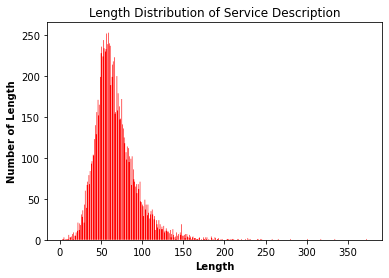

In [ ]:
plt.hist(lens, bins=500, facecolor='r',histtype='stepfilled')  
 
plt.xlabel('Length')
plt.ylabel('Number of Length')
plt.title('Length Distribution of Service Description')
plt.savefig('Data/HistogramDescriptionLength.pdf', format='pdf', dpi=300)

In [ ]:
len(top50data[(lens > 110)])

650

In [ ]:
finaltop50data = top50data

In [ ]:
finaltop50data.shape

(10957, 3)

In [ ]:
f = lambda x : len(x.split())
lens = finaltop50data['ServiceName'].apply(f)

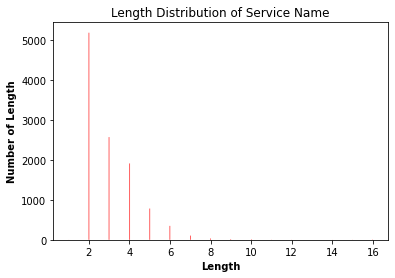

In [ ]:
plt.hist(lens, bins=500, facecolor='r',histtype='stepfilled')  
 
plt.xlabel('Length')
plt.ylabel('Number of Length')
plt.title('Length Distribution of Service Name')
plt.savefig('Data/HistogramNameLength.pdf', format='pdf', dpi=300)

In [ ]:
len(finaltop50data[(lens > 10)])

14

In [ ]:
finaltop50data = finaltop50data[(lens <= 10)]
finaltop50data.shape

(10943, 3)

In [ ]:
finaltop50data

,ServiceName,ServiceDescription,ServiceClassification
0,Google Maps API,Google Maps' services have been split into mul...,Mapping
1,Twitter API,"It has been split into multiple APIs, includin...",Social
2,YouTube API,The Data API allows users to integrate their p...,Video
3,Flickr API,The Flickr API can be used to retrieve photos ...,Photos
4,Facebook API,Its functions have been split among the follow...,Social
...,...,...,...
15339,Mollom API,Use the Mollom API to combat spam. Mollom is a...,Security
15340,FraudLabs MailBox Validator API,Use the MailBoxValidator Email Validation Web ...,Email
15341,Weewar API,"The Weewar API allows you to create notifiers,...",Games
15342,XigniteGlobalQuotes API,This API offers delayed stock quotes for equit...,Financial


## Final Preview 

In [ ]:
finaltop50data.shape

(10943, 3)

In [ ]:
labelcount = finaltop50data['ServiceClassification'].value_counts()

In [ ]:
labelcount

Tools                      767
Financial                  685
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Telephony                  300
Government                 300
Science                    298
Email                      255
Reference                  251
Search                     251
Video                      251
Security                   251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      191
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Project Management         142
Data                       142
Database                   136
Shipping                   136
Backend                    134
Weather 

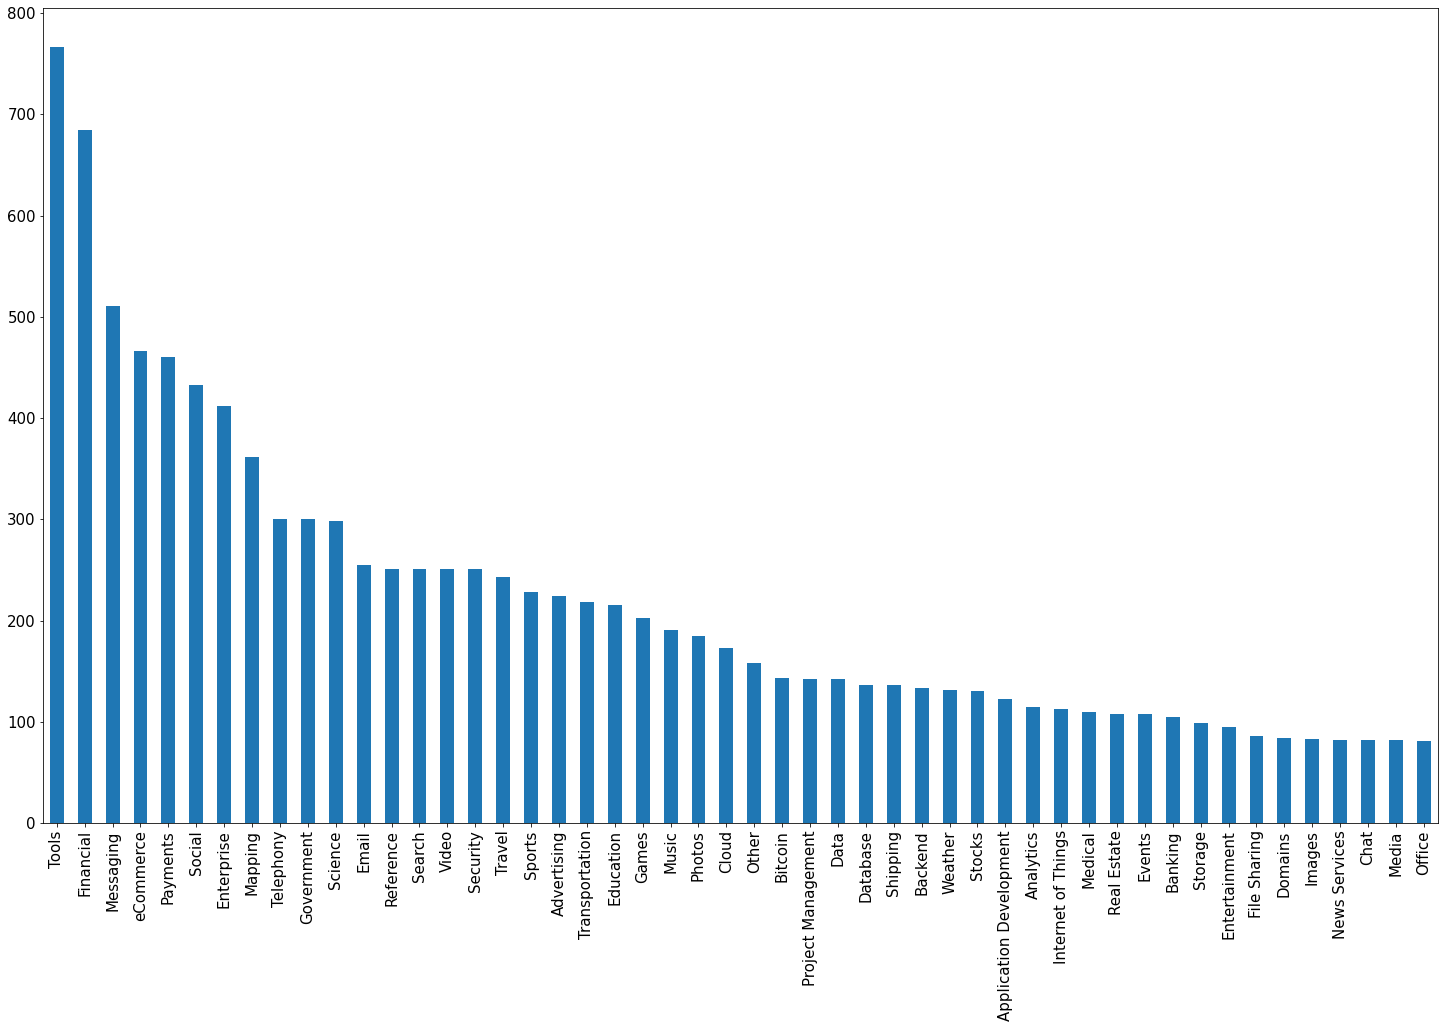

In [ ]:
plt.figure(figsize=(25, 15))
labelcount.plot(kind='bar', fontsize=15)
plt.savefig('Data/PostPrecessingHistogramTop50.pdf', format='pdf', dpi=300)

## 4. Save as CSV

In [ ]:
finaltop50data.to_csv('Data/ServiceWithName.csv', encoding='utf-8', index=False, header=True)

## 5. Save to H5

In [ ]:
h5f = HDFStore('Data/ServiceWithName.h5')
h5f.put('AllData', finaltop50data, format='table')
h5f.close()